In [168]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta, date

### Grouping by tips

In [10]:
df = pd.read_excel('/Users/devonbancroft/Desktop/DAT-10-14/class material/Unit2/data/superstore.xls')

In [22]:
grouper = df.groupby(pd.Grouper(key='Order Date', freq='M'))['Sales']

In [29]:
min_max = grouper.max()/grouper.sum()

In [30]:
grouper.max()

Order Date
2014-01-31     2573.820
2014-02-28     1256.220
2014-03-31    22638.480
2014-04-30     4164.050
2014-05-31     2715.930
2014-06-30     3266.376
2014-07-31     8187.650
2014-08-31     2060.744
2014-09-30     9449.950
2014-10-31     2735.952
2014-11-30     4548.810
2014-12-31     6999.960
2015-01-31     4297.644
2015-02-28     2541.980
2015-03-31     6354.950
2015-04-30     3812.970
2015-05-31     2973.320
2015-06-30     3050.376
2015-07-31     2309.650
2015-08-31     3080.000
2015-09-30     4228.704
2015-10-31     2453.430
2015-11-30     4643.800
2015-12-31     4899.930
2016-01-31     1592.850
2016-02-29     8749.950
2016-03-31     4912.590
2016-04-30     9099.930
2016-05-31     8399.976
2016-06-30     4476.800
2016-07-31     2799.960
2016-08-31     2887.056
2016-09-30     4355.168
2016-10-31    17499.950
2016-11-30     4499.985
2016-12-31     9892.740
2017-01-31     5443.960
2017-02-28     1640.700
2017-03-31    13999.960
2017-04-30     4799.984
2017-05-31     3359.952
2017-

In [31]:
min_max

Order Date
2014-01-31    0.180785
2014-02-28    0.277931
2014-03-31    0.406502
2014-04-30    0.147164
2014-05-31    0.114847
2014-06-30    0.094417
2014-07-31    0.241194
2014-08-31    0.073837
2014-09-30    0.115557
2014-10-31    0.086984
2014-11-30    0.057852
2014-12-31    0.100653
2015-01-31    0.236471
2015-02-28    0.212693
2015-03-31    0.164099
2015-04-30    0.111506
2015-05-31    0.098678
2015-06-30    0.123012
2015-07-31    0.080293
2015-08-31    0.083473
2015-09-30    0.065464
2015-10-31    0.078122
2015-11-30    0.061125
2015-12-31    0.065403
2016-01-31    0.085903
2016-02-29    0.380783
2016-03-31    0.094992
2016-04-30    0.234837
2016-05-31    0.147400
2016-06-30    0.110964
2016-07-31    0.071315
2016-08-31    0.092786
2016-09-30    0.059327
2016-10-31    0.293192
2016-11-30    0.056666
2016-12-31    0.101988
2017-01-31    0.123807
2017-02-28    0.080818
2017-03-31    0.237802
2017-04-30    0.131429
2017-05-31    0.075912
2017-06-30    0.064258
2017-07-31    0.053021


In [32]:
df.groupby('Category')['Product ID'].value_counts().nlargest(5)

Category         Product ID     
Office Supplies  OFF-PA-10001970    19
Technology       TEC-AC-10003832    18
Furniture        FUR-FU-10004270    16
                 FUR-CH-10001146    15
                 FUR-CH-10002647    15
Name: Product ID, dtype: int64

In [33]:
grouped = df.groupby('Category')['Product ID'].value_counts()

In [37]:
grouped.groupby('Category').nlargest(3)

Category         Category         Product ID     
Furniture        Furniture        FUR-FU-10004270    16
                                  FUR-CH-10001146    15
                                  FUR-CH-10002647    15
Office Supplies  Office Supplies  OFF-PA-10001970    19
                                  OFF-BI-10001524    14
                                  OFF-BI-10002026    14
Technology       Technology       TEC-AC-10003832    18
                                  TEC-AC-10002049    15
                                  TEC-AC-10003628    15
Name: Product ID, dtype: int64

In [44]:
df.groupby('Category')['Product ID'].value_counts().groupby('Category').nlargest(3)

Category         Category         Product ID     
Furniture        Furniture        FUR-FU-10004270    16
                                  FUR-CH-10001146    15
                                  FUR-CH-10002647    15
Office Supplies  Office Supplies  OFF-PA-10001970    19
                                  OFF-BI-10001524    14
                                  OFF-BI-10002026    14
Technology       Technology       TEC-AC-10003832    18
                                  TEC-AC-10002049    15
                                  TEC-AC-10003628    15
Name: Product ID, dtype: int64

### Visualization 

In [45]:
df = pd.read_csv('/Users/devonbancroft/Desktop/DAT-10-14/class material/Unit2/data/titanic.csv')

In [48]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [51]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

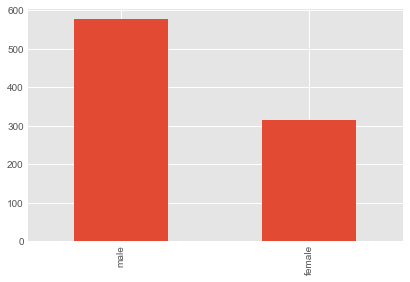

In [74]:
df.Sex.value_counts().plot(kind='bar')

In [62]:
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

In [73]:
plt.style.use('ggplot')

In [75]:
?df.plot

In [76]:
df.Embarked.plot()

TypeError: Empty 'DataFrame': no numeric data to plot

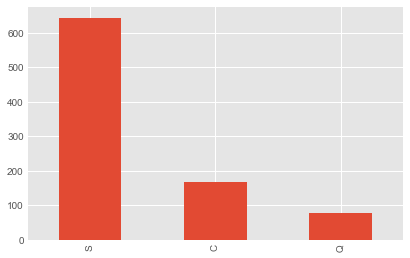

In [83]:
df.Embarked.value_counts().plot(kind='bar')

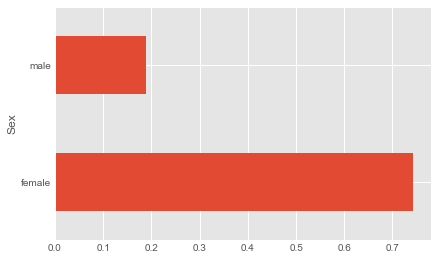

In [84]:
df.groupby('Sex').Survived.mean().plot(kind='barh')

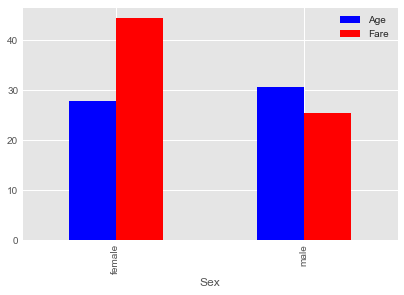

In [92]:
df.groupby('Sex')[['Age','Fare']].mean().plot(kind='bar', color=['blue','red'])

In [90]:
df.groupby('Sex')[['Age','Fare']].mean()

,Age,Fare
Sex,,
female,27.915709,44.479818
male,30.726645,25.523893


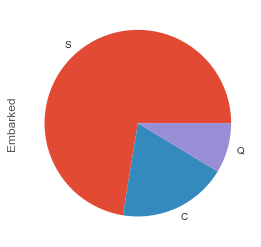

In [93]:
df['Embarked'].value_counts().plot(kind='pie')

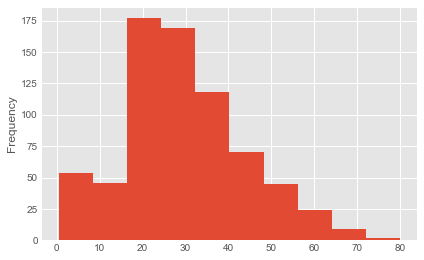

In [95]:
df.Age.plot(kind='Hist');

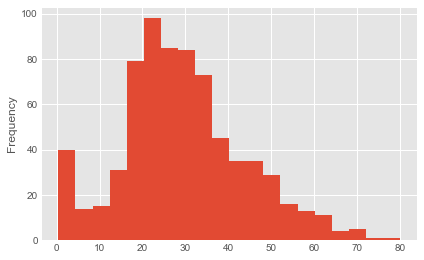

In [97]:
df.Age.plot(kind='Hist', bins=20);

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a25a91588>,
      dtype=object)

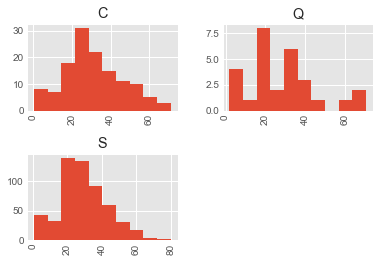

In [100]:
df.hist(column='Age', by='Embarked')

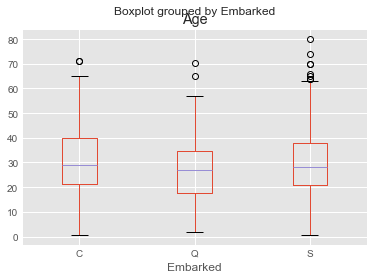

In [101]:
df.boxplot(column='Age', by='Embarked')

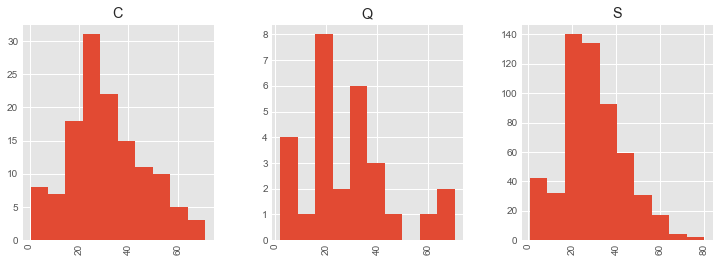

In [107]:
df.hist(column='Age', by='Embarked', layout=(1, 3), figsize=(12, 4));

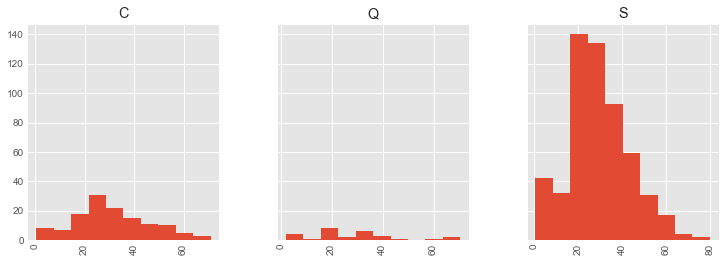

In [110]:
df.hist(column='Age', by='Embarked', layout=(1, 3), figsize=(12, 4), sharey=True);

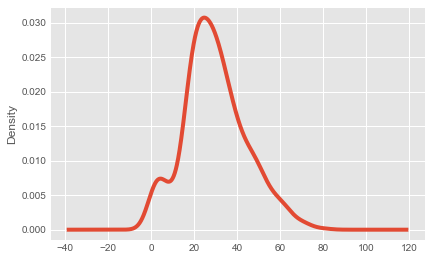

In [113]:
df.Age.plot(kind='kde');

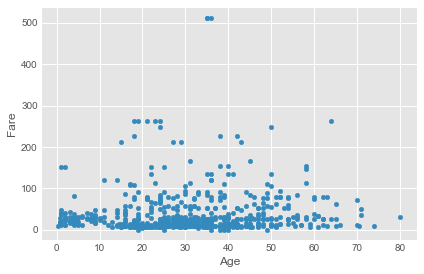

In [119]:
df.plot('Age','Fare',kind='scatter')

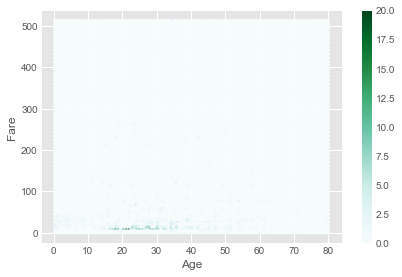

In [123]:
df.plot('Age', 'Fare',kind='hexbin')

In [128]:
df1 = pd.DataFrame({
    'X': np.random.randn(10000),
    'y': np.random.randn(10000)
}
)

In [130]:
df1.head()

,X,y
0,-1.129234,-1.122254
1,-0.138604,0.998983
2,0.994008,1.067015
3,-1.533464,-1.103375
4,0.181759,-1.683244


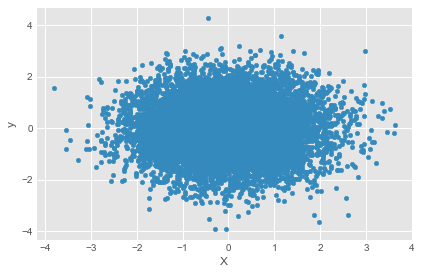

In [131]:
df1.plot('X','y', kind='scatter')

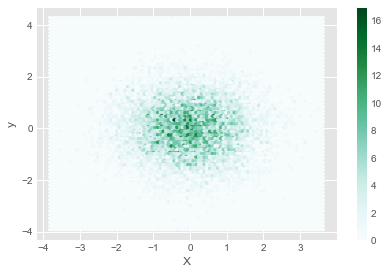

In [133]:
df1.plot('X','y', kind='hexbin');

In [134]:
df1.max()

X    3.627549
y    4.283576
dtype: float64

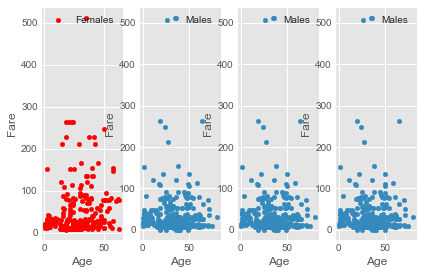

In [160]:
fig, ax = plt.subplots(1, 4)
df[df.Sex=='female'].plot('Age','Fare',kind='Scatter', ax=ax[0], color='red',label='Females')
df[df.Sex=='male'].plot('Age','Fare',kind='Scatter', ax=ax[1], label='Males')
df[df.Sex=='male'].plot('Age','Fare',kind='Scatter', ax=ax[2], label='Males')
df[df.Sex=='male'].plot('Age','Fare',kind='Scatter', ax=ax[3], label='Males')

In [157]:
ax

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a241d02e8>,
      dtype=object)

Overlaying

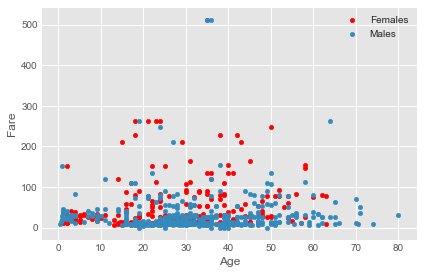

In [167]:
ax = df[df.Sex=='female'].plot('Age','Fare',kind='Scatter', color='red',label='Females')
df[df.Sex=='male'].plot('Age','Fare',kind='Scatter', ax=ax, label='Males');

### Seaborn

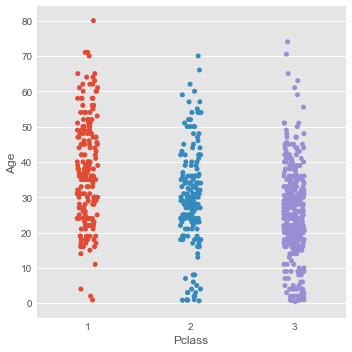

In [170]:
df = pd.read_csv('/Users/devonbancroft/Desktop/DAT-10-14/class material/Unit2/data/titanic.csv')
sns.catplot(x='Pclass',y='Age', data=df);

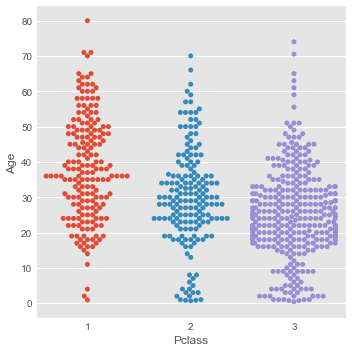

In [172]:
sns.catplot(x='Pclass',y='Age', kind='swarm', data=df);

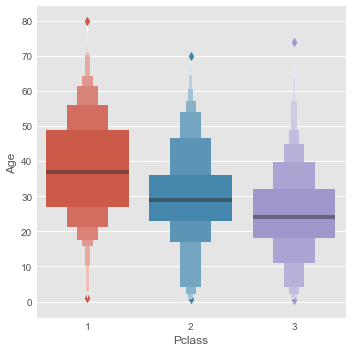

In [188]:
sns.catplot(x='Pclass',y='Age', kind='boxen', data=df)

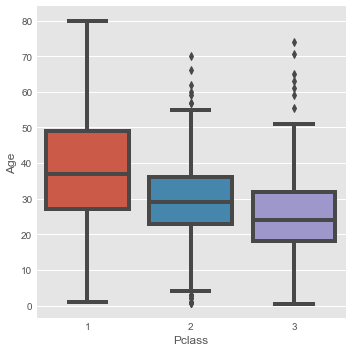

In [189]:
sns.catplot(x='Pclass',y='Age', kind='box', data=df)

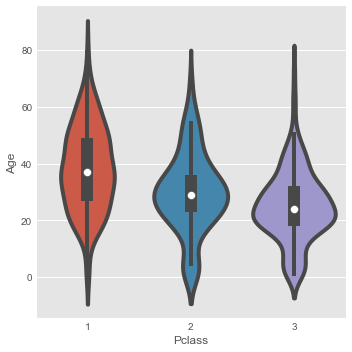

In [190]:
sns.catplot(x='Pclass',y='Age', kind='violin', data=df)

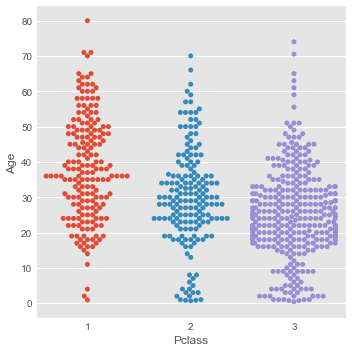

In [191]:
sns.catplot(x='Pclass', y='Age', kind='swarm', data=df)

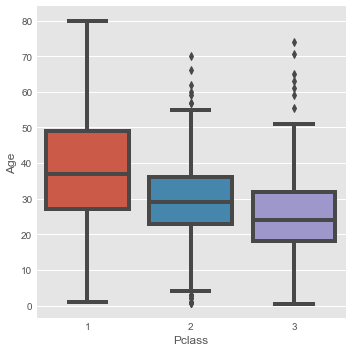

In [192]:
sns.catplot(x='Pclass', y='Age', kind='box', data=df)

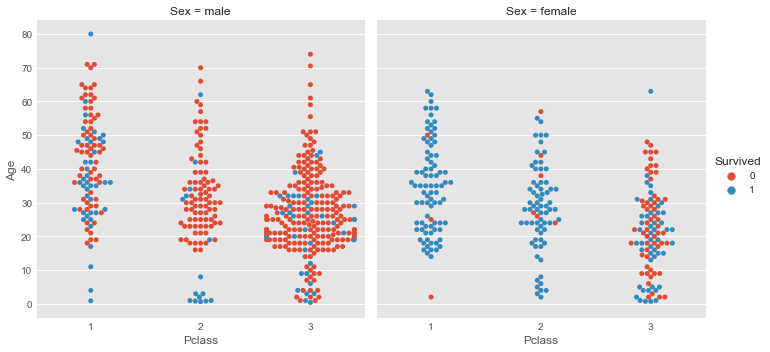

In [203]:
sns.catplot(x='Pclass', y='Age', kind='swarm', hue='Survived', col='Sex', data=df)

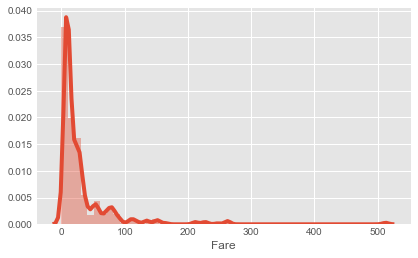

In [204]:
sns.distplot(df['Fare'])

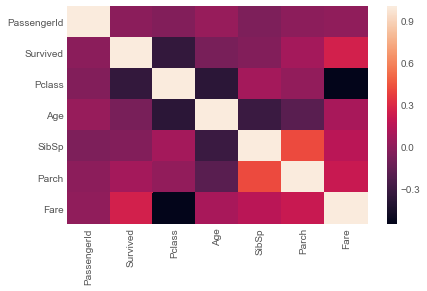

In [206]:
sns.heatmap(df.corr())

In [211]:
df['Sex_num'] = df.Sex.map({'female': 1, 'male': 0})

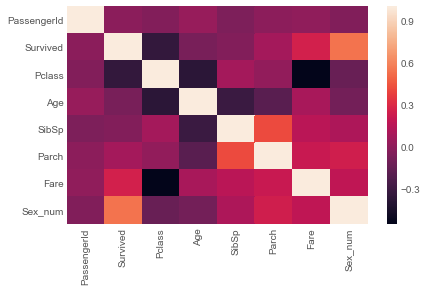

In [212]:
sns.heatmap(df.corr())

/Users/devonbancroft/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/devonbancroft/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


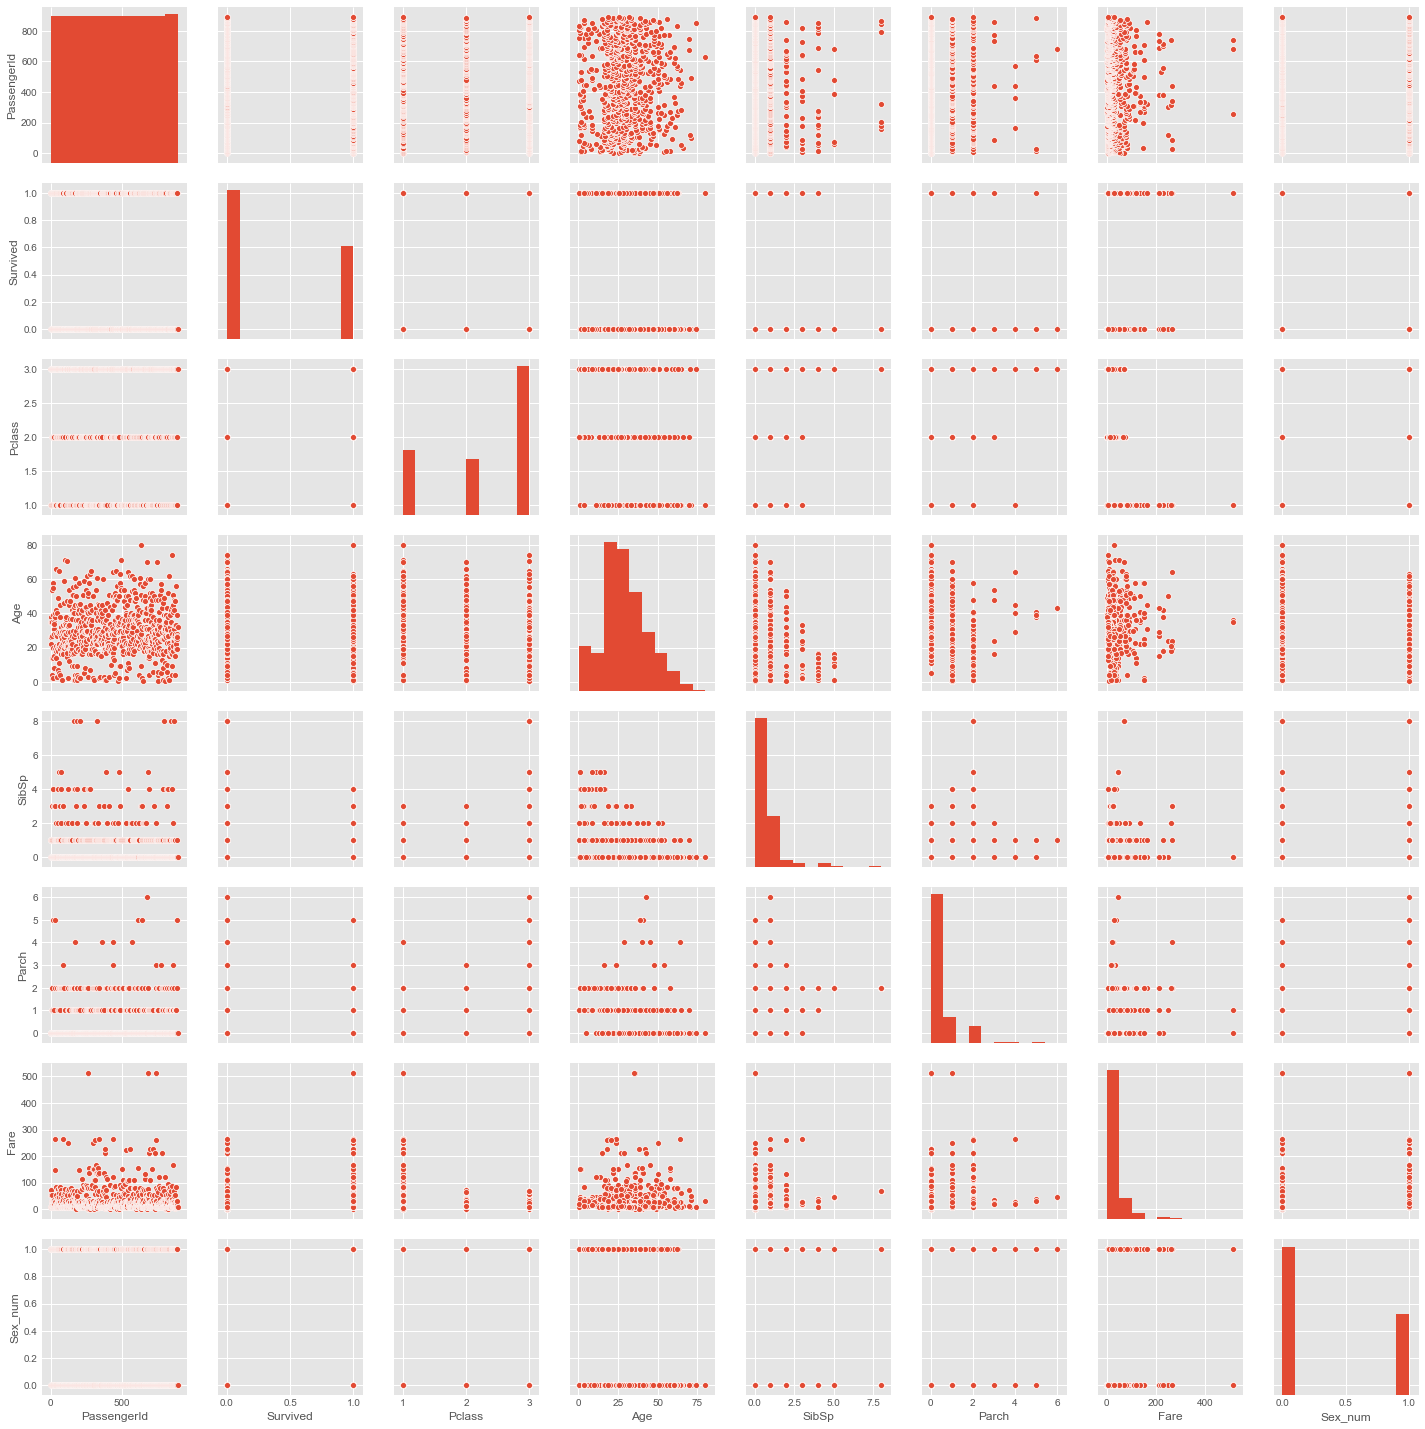

In [213]:
sns.pairplot(df)

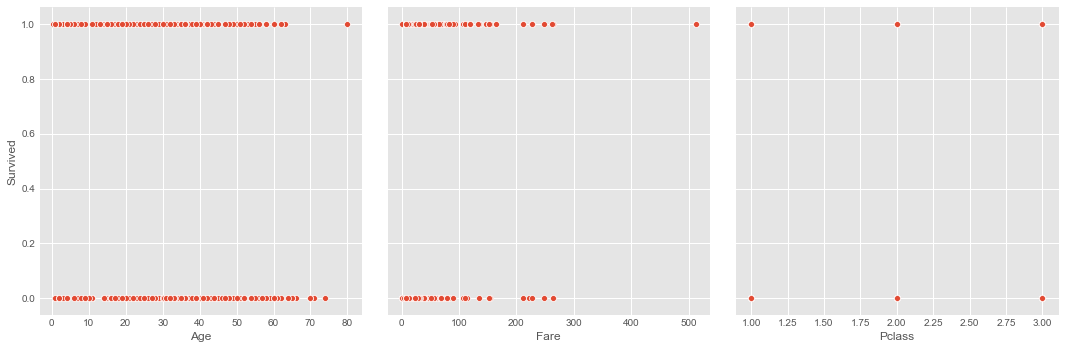

In [218]:
sns.pairplot(df, x_vars=['Age', 'Fare', 'Pclass'], y_vars='Survived', height=5)

In [217]:
?sns.pairplot